In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


`Columns Descriptions`
1. Release_Date: Date when the movie was released.
1. Title: Name of the movie.
1. Overview: Brief summary of the movie.
1. Popularity: It is a very important metric computed by TMDB developers based on the number of views per day, votes per day, number of users marked it as "favorite" and "watchlist" for the data, release date and more other metrics.
1. Vote_Count: Total votes received from the viewers.
1. Vote_Average: Average rating based on vote count and the number of viewers out of 10.
1. Original_Language: Original language of the movies. Dubbed version is not considered to be original language.
1. Genre: Categories the movie it can be classified as.
1. Poster_Url: Url of the movie poster.


---



---


*   `EDA Questions`




1. Q1: What is the most frequent genre in the dataset?
1. Q2: What genres has highest votes?
1. Q3: What movie got the highest popularity? what's its genre?
1. Q4: Which year has the most filmmed movies?




In [2]:
from google.colab import files
uploaded = files.upload()

Saving mymoviedb.csv to mymoviedb.csv


In [35]:
data = pd.read_csv('mymoviedb.csv',lineterminator='\n')

In [36]:
data.head(2)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...


In [37]:
data.shape

(9827, 9)

In [38]:
data.size

88443

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [40]:
data.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [41]:
data.isnull().sum()

,0
Release_Date,0
Title,0
Overview,0
Popularity,0
Vote_Count,0
Vote_Average,0
Original_Language,0
Genre,0
Poster_Url,0




---


All of them have o null value so no need of null value handling

---



In [42]:
num_col = data.select_dtypes(include=np.number).columns
num_col

Index(['Popularity', 'Vote_Count', 'Vote_Average'], dtype='object')

In [43]:
cat_col = data.select_dtypes(include='object').columns
cat_col

Index(['Release_Date', 'Title', 'Overview', 'Original_Language', 'Genre',
       'Poster_Url'],
      dtype='object')

<Axes: >

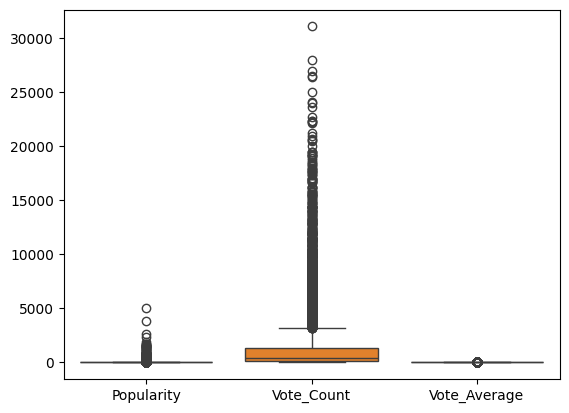

In [44]:
sns.boxplot(data[num_col])

In [45]:
data.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


<Axes: ylabel='Popularity'>

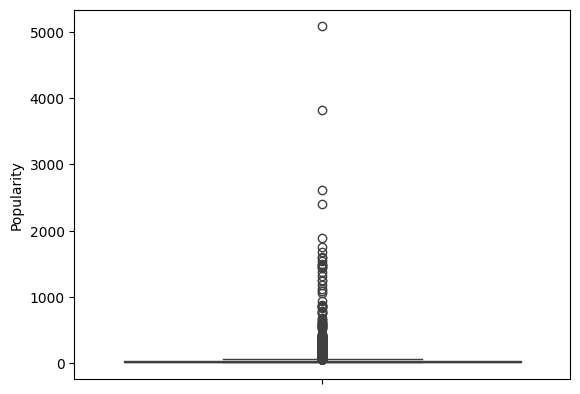

In [46]:
sns.boxplot(data['Popularity'])



---


most of the data came under outlier so no need of this. othervise we doen't have data


---

lets drop duplicate rows


---



In [47]:
data.head(2)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...


In [48]:
data.duplicated().sum()

0



---

lets drop unwanted columns

---
i felt Overview and poster url unwanted so i dropped those


---




In [49]:
data.drop(['Overview','Poster_Url'],axis=1,inplace=True)

In [50]:
data.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction"
1,2022-03-01,The Batman,3827.658,1151,8.1,en,"Crime, Mystery, Thriller"
2,2022-02-25,No Exit,2618.087,122,6.3,en,Thriller
3,2021-11-24,Encanto,2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy"
4,2021-12-22,The King's Man,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War"


In [51]:
data['Genre'] = data['Genre'].str.split(', ')

In [52]:
data.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,en,"[Action, Adventure, Science Fiction]"
1,2022-03-01,The Batman,3827.658,1151,8.1,en,"[Crime, Mystery, Thriller]"
2,2022-02-25,No Exit,2618.087,122,6.3,en,[Thriller]
3,2021-11-24,Encanto,2402.201,5076,7.7,en,"[Animation, Comedy, Family, Fantasy]"
4,2021-12-22,The King's Man,1895.511,1793,7.0,en,"[Action, Adventure, Thriller, War]"


In [53]:
data['Genre'] = data['Genre'].explode().reset_index(drop=True)

In [65]:
data['Rated'] = np.where(data['Vote_Average'] > 7, 'hit', np.where(data['Vote_Average'] > 5, 'Avg', 'flop'))

In [66]:
data.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Rated
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,en,Action,hit
1,2022-03-01,The Batman,3827.658,1151,8.1,en,Adventure,hit
2,2022-02-25,No Exit,2618.087,122,6.3,en,Science Fiction,Avg
3,2021-11-24,Encanto,2402.201,5076,7.7,en,Crime,hit
4,2021-12-22,The King's Man,1895.511,1793,7.0,en,Mystery,Avg


Data Visulization

<Axes: xlabel='Original_Language', ylabel='count'>

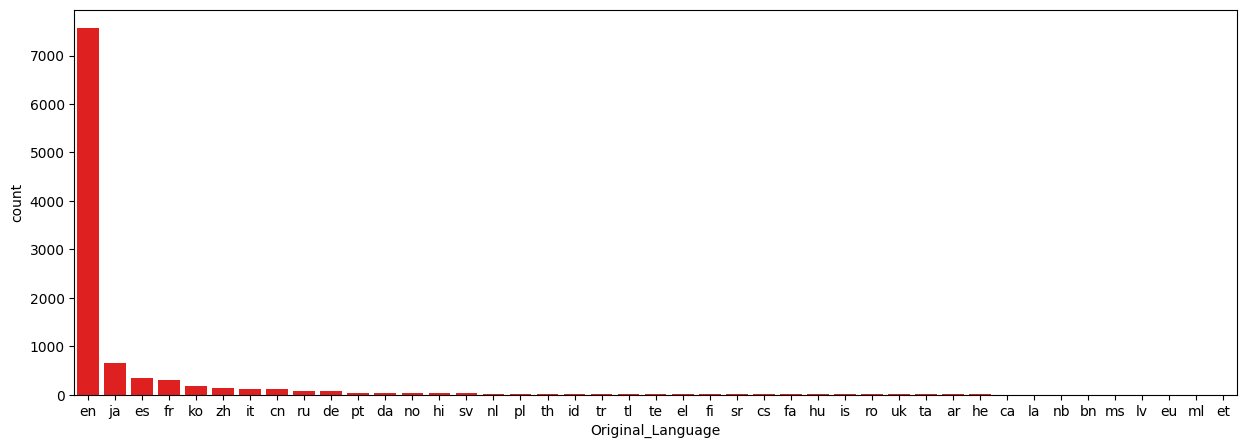

In [68]:
plt.figure(figsize=(15,5))
sns.barplot(x=data['Original_Language'].value_counts().index,y=data['Original_Language'].value_counts(),color='red')

Q1: What is the most frequent genre in the dataset?

<Axes: xlabel='count', ylabel='Genre'>

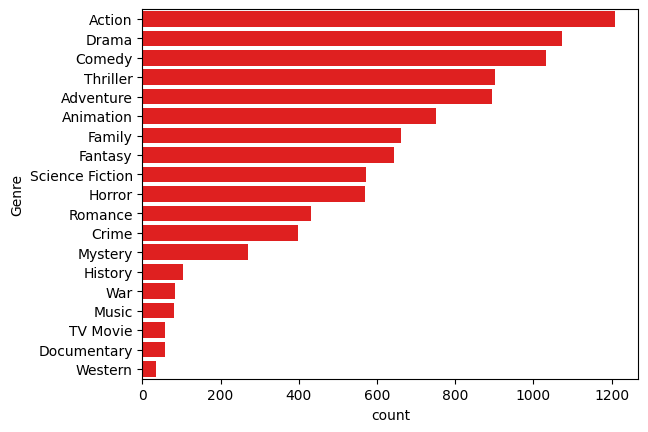

In [69]:
sns.barplot(y=data['Genre'].value_counts().index,x=data['Genre'].value_counts(),color='red')


<Axes: xlabel='count', ylabel='Rated'>

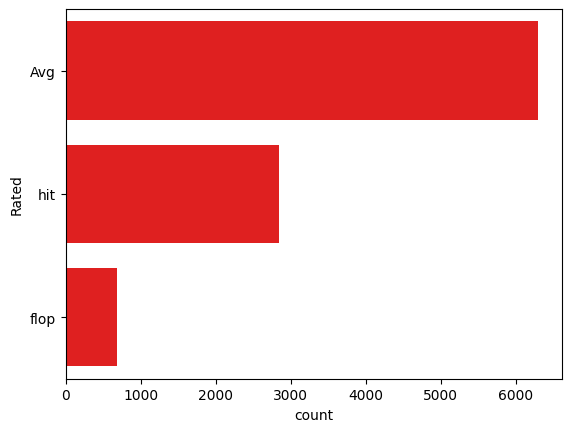

In [67]:
sns.barplot(y=data['Rated'].value_counts().index,x=data['Rated'].value_counts(),color='red')

Q2: What genres has highest votes?

In [72]:
data.head(2)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Rated
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,en,Action,hit
1,2022-03-01,The Batman,3827.658,1151,8.1,en,Adventure,hit


In [74]:
popular_movies = data[data['Rated'] == 'hit']

<Axes: xlabel='count', ylabel='Genre'>

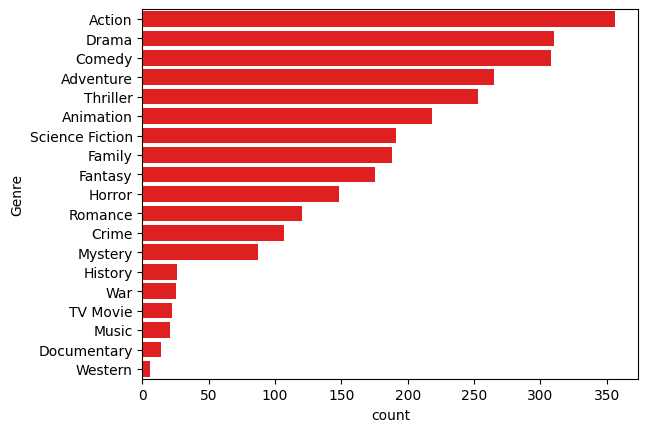

In [75]:
sns.barplot(y=popular_movies['Genre'].value_counts().index,x=popular_movies['Genre'].value_counts(),color='red')

Q3: What movie got the highest popularity? what's its genre?


In [83]:
data[data['Popularity'] == data['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Rated
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,en,Action,hit


Q4: Which year has the most filmmed movies?

In [84]:
data['Release_Date'] = pd.to_datetime(data['Release_Date'])

In [85]:
data['Release_year'] = data['Release_Date'].dt.year

<Axes: >

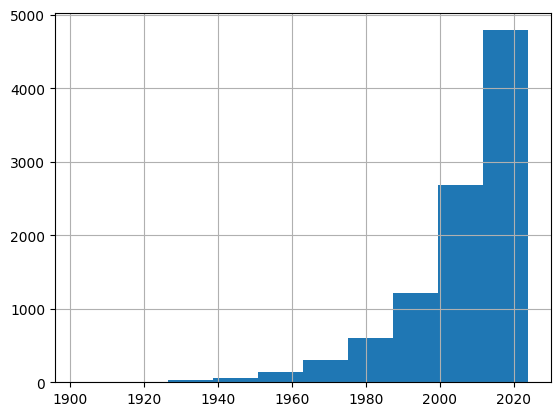

In [91]:
data['Release_year'].hist()

,count
Release_year,
1902,1
1920,1
1921,2
1922,2
1925,1
...,...
2020,453
2021,714
2022,208


2019